In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('E:\\Artificial Intelligence\\S\\MSIT_ML_CLASS-master\\MSIT_ML_CLASS-master\\datasets\\boston_housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [15]:
clean_data = data[['RM','MEDV']].values
clean_data[:20]

array([[6.575e+00, 5.040e+05],
       [6.421e+00, 4.536e+05],
       [7.185e+00, 7.287e+05],
       [6.998e+00, 7.014e+05],
       [7.147e+00, 7.602e+05],
       [6.430e+00, 6.027e+05],
       [6.012e+00, 4.809e+05],
       [6.172e+00, 5.691e+05],
       [5.631e+00, 3.465e+05],
       [6.004e+00, 3.969e+05],
       [6.377e+00, 3.150e+05],
       [6.009e+00, 3.969e+05],
       [5.889e+00, 4.557e+05],
       [5.949e+00, 4.284e+05],
       [6.096e+00, 3.822e+05],
       [5.834e+00, 4.179e+05],
       [5.935e+00, 4.851e+05],
       [5.990e+00, 3.675e+05],
       [5.456e+00, 4.242e+05],
       [5.727e+00, 3.822e+05]])

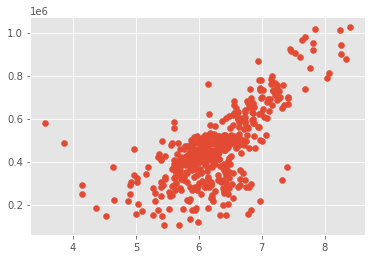

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter(clean_data[:,0],clean_data[:,1]);

In [20]:
def compute_error(m,b,points):
    error = 0
    for point in points:
        x = point[0]
        y = point[1]
        
        error+= (y- (m*x + b))**2
        
    return error/len(points)

In [21]:
compute_error(0,0,clean_data)

233709014171.77914

In [22]:
#get the data
def step_gradient(b_current, m_current,points,learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0,len(points)):
        
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y- ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y- ((m_current * x) + b_current))
        
    new_b = b_current - (learningRate * b_gradient)
    new_m = b_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [23]:
#how to use the function
step_gradient(0,0,clean_data, 0.0001)

[90.86858895705524, 581.855422331288]

In [26]:
points = clean_data

learningRate = 0.001
initial_b = 0 #initial y-intercept guess
initial_m = 0 #initial slope guess
num_iterations = 10000

b = initial_b
m = initial_m

first_error = compute_error(m,b,points)
print("We are starting at b = ",initial_b, "m = ", initial_m, "start error = ", first_error)
error_list = []

for i in range(num_iterations):
    
    b,m = step_gradient(b,m,points,learningRate)
    error_list.append(compute_error(m,b,points))
    
print("Ending at b = ", b, "m = ",m, "error = ",error_list[-1])

We are starting at b =  0 m =  0 start error =  233709014171.77914
Ending at b =  62669.14387590533 m =  62765.337007814 error =  19615175262.749245


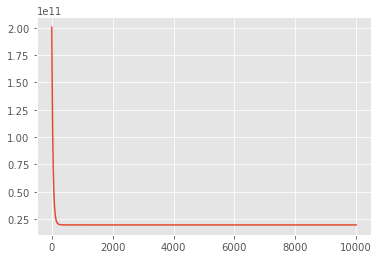

In [28]:
plt.plot(error_list);

In [30]:
x = np.arange(1,10)
y = m*x + b
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[125434.48088372 188199.81789153 250965.15489935 313730.49190716
 376495.82891498 439261.16592279 502026.5029306  564791.83993842
 627557.17694623]


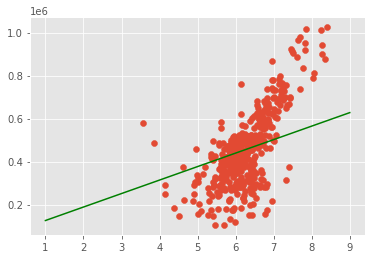

In [31]:
plt.scatter(clean_data[:,0],clean_data[:,1])

plt.plot(x,y,c="g");